In [72]:
import numpy as np
import pandas as pd
import seaborn as sns

In [73]:
class Perceptron():
    def __init__(self, learning_rate, num_iter= 50, random_state = 1):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1+X.shape[1])
        self.errors_ = []
        
        for i in range(self.num_iter):
            errors = 0
            
            for xi, target in zip(X, y):
                update = self.learning_rate * (target -self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


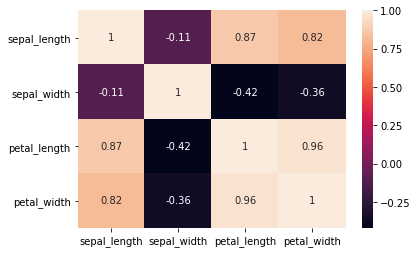

In [74]:

sns.heatmap(df.corr(), annot=True)

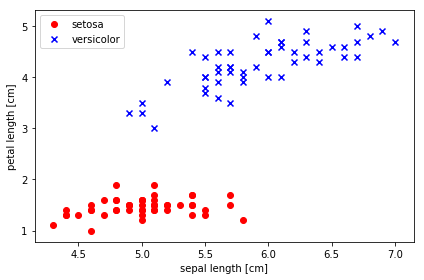

In [78]:
ppn = Perceptron(learning_rate=0.1, num_iter=10)

df = pd.read_csv("irishDataset.csv")


y= df.iloc[0:100, 4]
y = np.where(y == 'setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values


# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

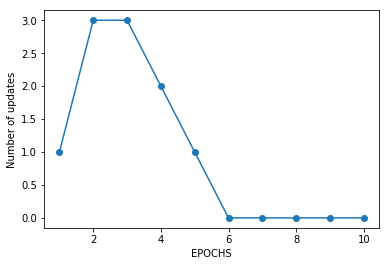

In [89]:
ppn.fit(X,y)
plt.xlabel('EPOCHS')
plt.ylabel('Number of updates')
plt.plot(range(1, len(ppn.errors_)  + 1), ppn.errors_, marker ='o')
